# House price pediction 


In [1]:
import os
os.path.abspath("")

'C:\\Users\\asus'

In [2]:
import pandas as pd
data = pd.read_csv('AmesHousing.csv')

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
house_data = pd.read_csv('AmesHousing.csv')

In [8]:
print(house_data)

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... 

In [9]:
house_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
house_data.shape

(2930, 82)

In [18]:
# Separate numerical and categorical columns
numerical_cols = house_data.select_dtypes(include=[np.number]).columns
categorical_cols = house_data.select_dtypes(exclude=[np.number]).columns

In [19]:
# Fill missing values for numerical columns with mean
house_data[numerical_cols] = house_data[numerical_cols].fillna(house_data[numerical_cols].mean())

In [20]:
# Fill missing values for categorical columns with the most frequent value
house_data[categorical_cols] = house_data[categorical_cols].fillna(house_data[categorical_cols].mode().iloc[0])

In [21]:
# Convert categorical variables to numerical (example: using one-hot encoding)
house_data = pd.get_dummies(house_data)

In [22]:
# Split the data into features and labels
X = house_data.drop('SalePrice', axis=1)
Y = house_data['SalePrice']

In [23]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [24]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Model training using Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [26]:
# Evaluate the model on the training data
Y_train_pred = model.predict(X_train_scaled)
mae_train = mean_absolute_error(Y_train, Y_train_pred)
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)
print(f'Training MAE: {mae_train}')
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')

Training MAE: 13535.777378942836
Training MSE: 427950530.2704582
Training R2: 0.9349731898356854


In [27]:
# Evaluate the model on the testing data
Y_test_pred = model.predict(X_test_scaled)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)
print(f'Testing MAE: {mae_test}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

Testing MAE: 376349743933885.6
Testing MSE: 8.300053003232786e+31
Testing R2: -1.4892388444427763e+22


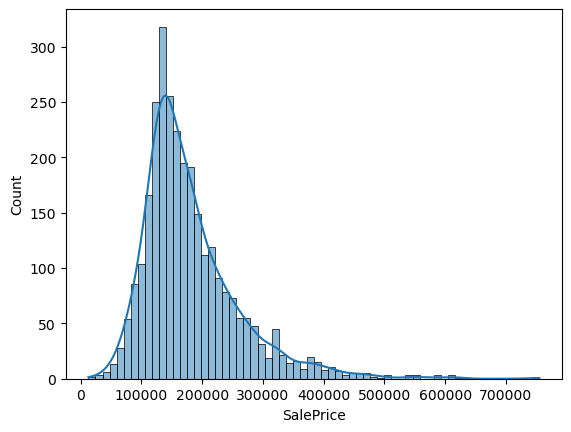

In [28]:
# Visualize distribution of SalePrice
sns.histplot(house_data['SalePrice'], kde=True)
plt.show()

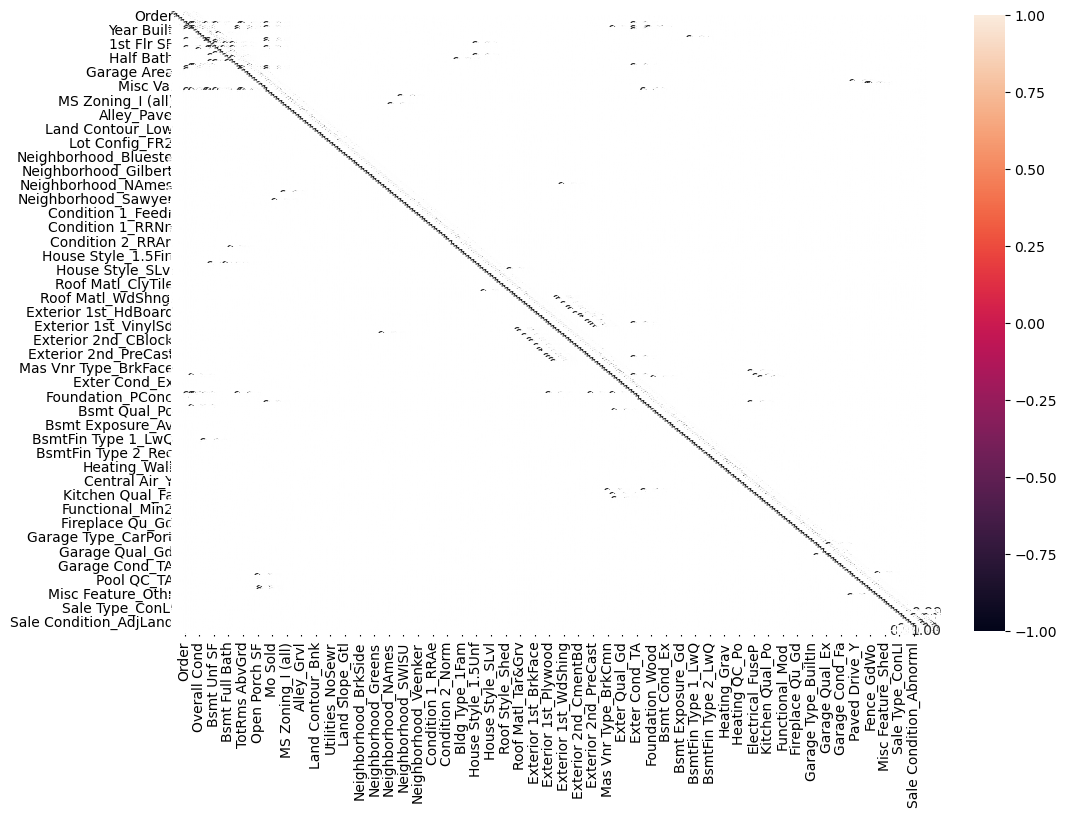

In [34]:
# Correlation heatmap
corr_matrix = house_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, Y_train)

RandomForestRegressor()

In [37]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

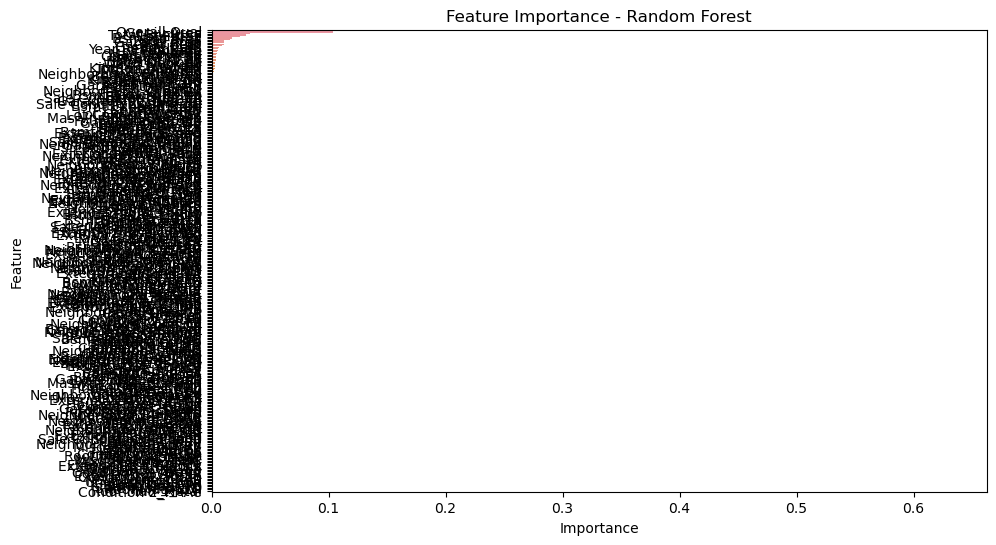

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()